# SQD from real quantum hardware samples

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib

/home/david/.venvs/tikzplot/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


# Equilibrium
- Initializing LUCJ ansatz with regularization $\lambda=0.1$ and without. Regularizing the lost diagonal Coulomb operator terms when localizing improves the energy estimate signficantly in a noisy SQD simulation

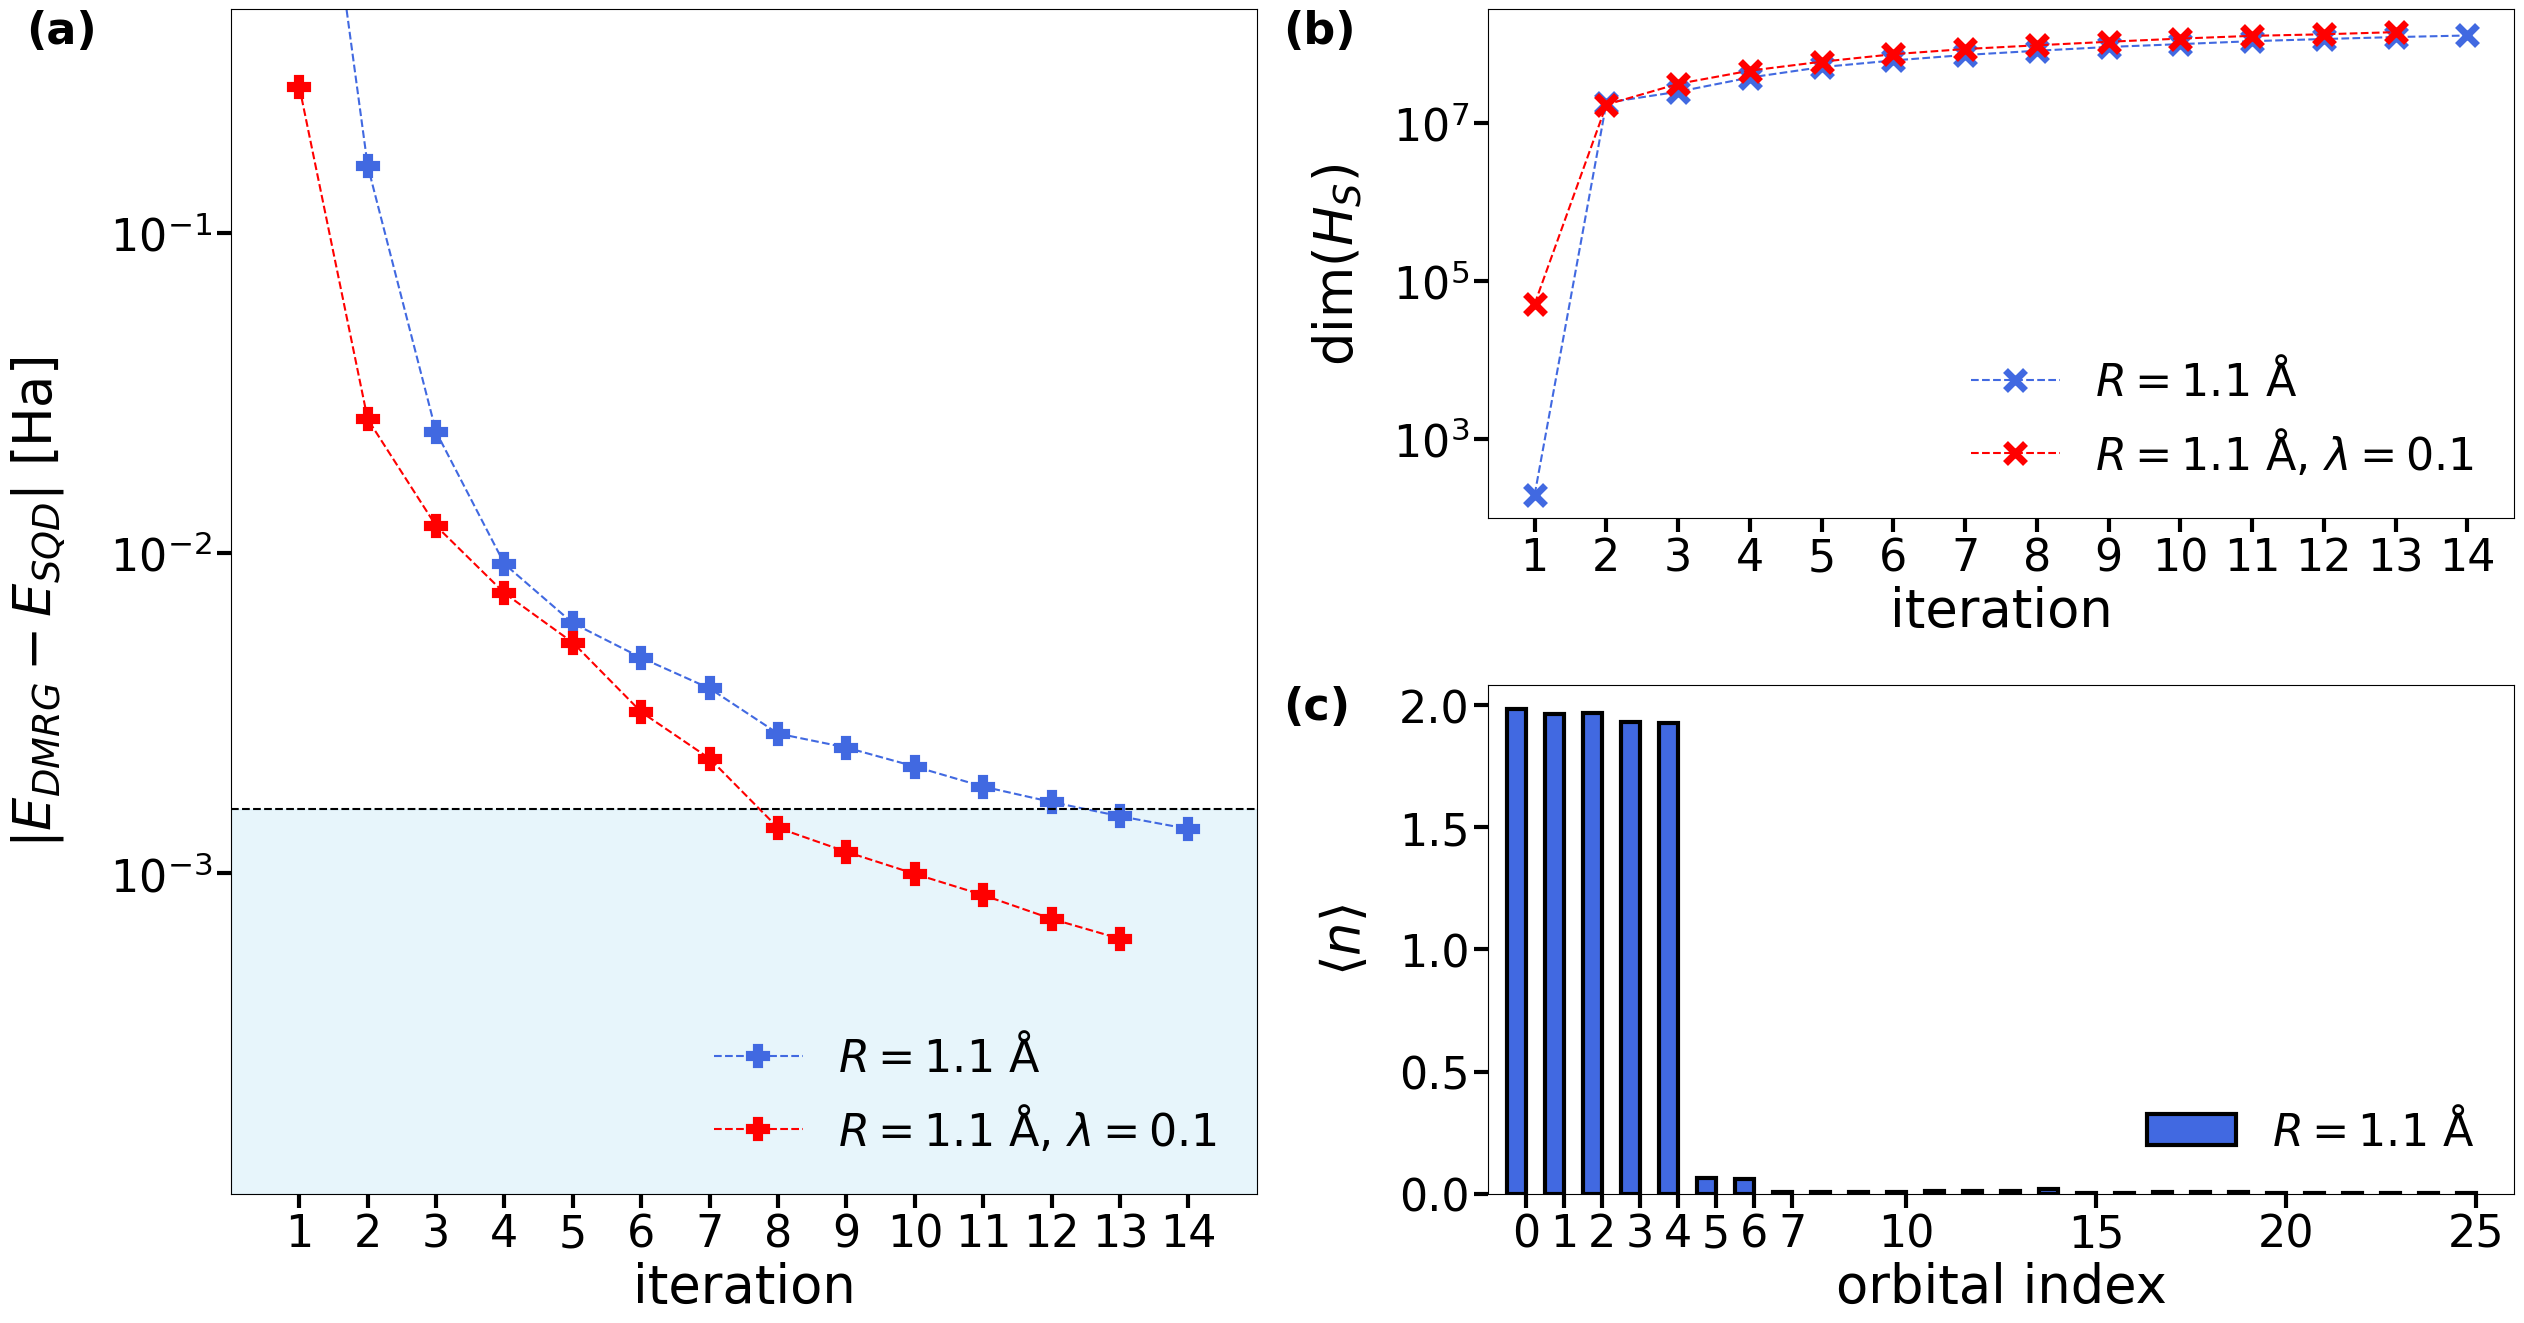

In [3]:
plt.rcParams.update({
    "font.size": 32,          # default text size
    "axes.titlesize": 32,     # axes title
    "axes.labelsize": 38,     # x and y labels
    "xtick.labelsize": 32,    # x tick labels
    "ytick.labelsize": 32,    # y tick labels
    "legend.fontsize": 32,    # legend
    "figure.titlesize": 32,   # figure suptitle
})

data = np.loadtxt("../data/ibm-q/r=1.1.csv",delimiter=',',skiprows=1)
nit = data[:,0]
E = data[:,1]
subspace_dim = data[:,2]
error = abs(-109.27710729903457-E)

fig, axes = plt.subplot_mosaic(
    [
        ["left", "right_top"],
        ["left", "right_bottom"],
    ],
    figsize=(26, 14),
)

fig.subplots_adjust(wspace=0.2)
ax1 = axes["left"]          # your existing left plot (error vs iterations)
ax2 = axes["right_top"]     # new top-right subplot
ax3 = axes["right_bottom"]  # new bottom-right subplot

ax1.semilogy(nit, error, '--P', c="royalblue", markersize=15,markeredgewidth=3, label=r'$R=1.1$ Å')
ax1.set_xlabel(r"iteration")
ax1.set_ylabel(r"$|E_{DMRG}-E_{SQD}|$ [Ha]",labelpad=30)
ax1.fill_between(np.arange(0,16), 1e-4, 1.594e-3, color='skyblue', alpha=0.2)
ax1.set_xlim(0,15)
ax1.set_ylim(1e-4,0.5)

ax2.semilogy(nit,subspace_dim, '--x', c="royalblue", markersize=15,markeredgewidth=5, label=r'$R=1.1$ Å')
ax2.set_xlabel(r"iteration")
ax2.set_ylabel(r"dim$(H_S)$",labelpad=20)

data = np.loadtxt("../data/ibm-q/r=1.1_reg=0.1.csv",delimiter=',',skiprows=1)
nit = data[:,0]
E = data[:,1]
subspace_dim = data[:,2]
error = abs(-109.27710729903457-E)
ax1.semilogy(nit, error, '--P', c="red", markersize=15,markeredgewidth=3, label=r'$R=1.1$ Å, $\lambda=0.1$')
ax1.set_yticks([1e-1,1e-2,1e-3])
ax2.semilogy(nit,subspace_dim, '--x', c="red", markersize=15,markeredgewidth=5, label=r'$R=1.1$ Å, $\lambda = 0.1$')

ax1.axhline(1.594e-3, linestyle='--',c='k')

ax1.legend()
ax2.legend()

norbs = np.arange(0,26)
orbital_index = np.arange(26)  # 0..25

orbital_index = np.arange(26)  # 0..25
width = 0.5                   # bar width

avg_occupancy_09 = [
    1.98274286545086,
    1.96406254057378,
    1.96653766577569,
    1.92884940354883,
    1.92726919356797,
    0.0628428243104436,
    0.0617803450581184,
    0.00741019444111768,
    0.00562621206992076,
    0.00548620760103907,
    0.00590163278103502,
    0.0101979802992289,
    0.00926095920738139,
    0.00945000027549622,
    0.0172213480385741,
    0.00465897511612408,
    0.00454032073289053,
    0.00514389732863082,
    0.00537911662413598,
    0.00541924211408212,
    0.00190830486069885,
    0.00184694162706743,
    0.00200541584138064,
    0.00139518204189068,
    0.00136104821487577,
    0.00170218249758456,
]

# Shift one set left and the other right
ax3.bar(
    orbital_index - width/2, avg_occupancy_09,
    width=width, color='royalblue', alpha=1,
    edgecolor="black", linewidth=3, label=r'$R=1.1$ Å'
)

ax3.set_xlabel("orbital index")
ax3.set_ylabel(r"$\langle n \rangle$", labelpad=20)
ax3.set_xlim(-1, 26)
ax3.set_xticks([0,1,2,3,4,5,6,7,10,15,20,25])

ax1.set_xticks(np.arange(1,15))
ax2.set_xticks(np.arange(1,15))


for ax, label in zip([ax1, ax2, ax3], ["(a)", "(b)", "(c)"]):
    ax.text(
        -0.2, 1, label,
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=32, fontweight="bold"
    )
    ax.tick_params(which='both',length=10,width=3)
    ax.minorticks_off()
    ax.legend(framealpha=0.0, loc='lower right')


plt.tight_layout()
plt.savefig("sqd_convergence_regularization.svg", dpi=500)

# Applying multiple layers

The depth becomes too significant on NISQ devices and the accuracy is not improving due to the noise

The equilibrium $R=1.1 Å$ vs. dissociation $R=2.1 Å$ goes to show that equilibrium electronic structure is easier to capture. This is due to not optimizing the LUCJ ansatz, and just seeding it from CCSD (which is a bad seed in the dissociation region).

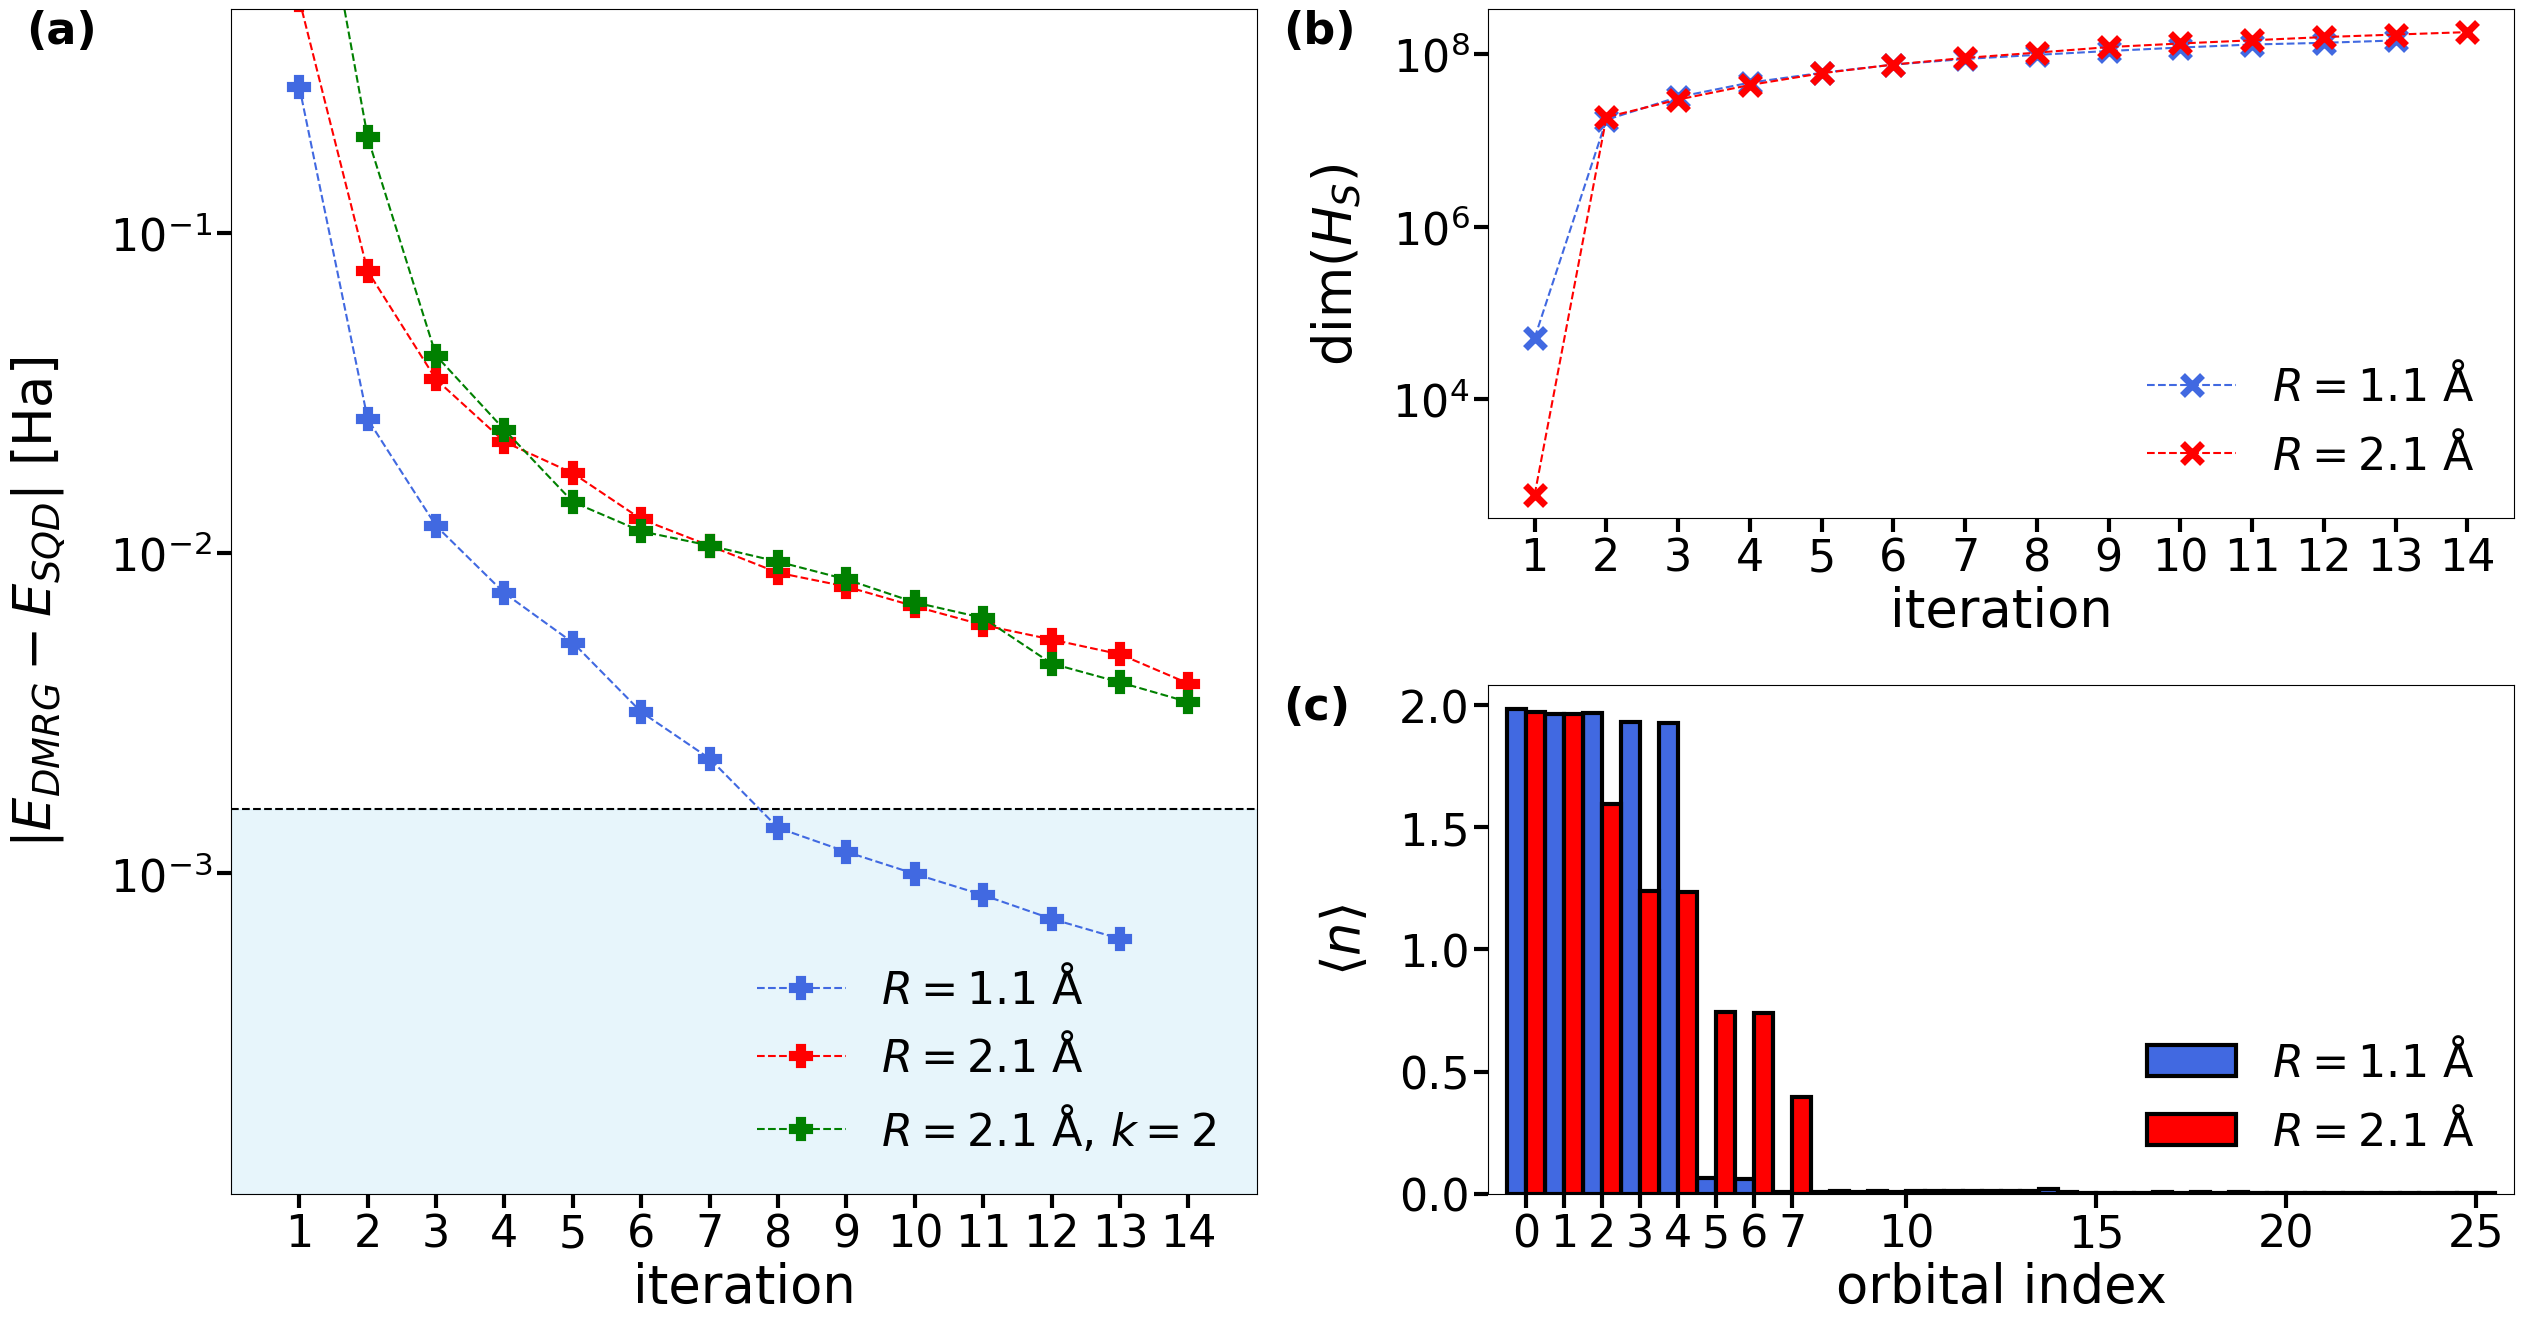

In [4]:
plt.rcParams.update({
    "font.size": 32,          # default text size
    "axes.titlesize": 32,     # axes title
    "axes.labelsize": 38,     # x and y labels
    "xtick.labelsize": 32,    # x tick labels
    "ytick.labelsize": 32,    # y tick labels
    "legend.fontsize": 32,    # legend
    "figure.titlesize": 32,   # figure suptitle
})

data = np.loadtxt("../data/ibm-q/r=1.1_reg=0.1.csv",delimiter=',',skiprows=1)
nit = data[:,0]
E = data[:,1]
subspace_dim = data[:,2]
error = abs(-109.27710729903457-E)

fig, axes = plt.subplot_mosaic(
    [
        ["left", "right_top"],
        ["left", "right_bottom"],
    ],
    figsize=(26, 14),
)

fig.subplots_adjust(wspace=0.2)
ax1 = axes["left"]          # your existing left plot (error vs iterations)
ax2 = axes["right_top"]     # new top-right subplot
ax3 = axes["right_bottom"]  # new bottom-right subplot

ax1.semilogy(nit, error, '--P', c="royalblue", markersize=15,markeredgewidth=3, label=r'$R=1.1$ Å')
ax1.set_xlabel(r"iteration")
ax1.set_ylabel(r"$|E_{DMRG}-E_{SQD}|$ [Ha]",labelpad=30)
ax1.fill_between(np.arange(0,16), 1e-4, 1.594e-3, color='skyblue', alpha=0.2)
ax1.set_xlim(0,15)
ax1.set_ylim(1e-4,0.5)

ax2.semilogy(nit,subspace_dim, '--x', c="royalblue", markersize=15,markeredgewidth=5, label=r'$R=1.1$ Å')
ax2.set_xlabel(r"iteration")
ax2.set_ylabel(r"dim$(H_S)$",labelpad=20)

data = np.loadtxt("../data/ibm-q/r=2.1.csv",delimiter=',',skiprows=1)
nit = data[:,0]
E = data[:,1]
subspace_dim = data[:,2]
error = abs(-108.97294348807239-E)
ax1.semilogy(nit, error, '--P', c="red", markersize=15,markeredgewidth=3, label=r'$R=2.1$ Å')

data = np.loadtxt("../data/ibm-q/r=2.1_k=2.csv",delimiter=',',skiprows=1)
nit = data[:,0]
E = data[:,1]
subspace_dim = data[:,2]
error = abs(-108.97294348807239-E)
ax1.semilogy(nit, error, '--P', c="green", markersize=15,markeredgewidth=3, label=r'$R=2.1$ Å, $k=2$')

ax1.set_yticks([1e-1,1e-2,1e-3])
ax2.semilogy(nit,subspace_dim, '--x', c="red", markersize=15,markeredgewidth=5, label=r'$R=2.1$ Å')

ax1.axhline(1.594e-3, linestyle='--',c='k')

ax1.legend()
ax2.legend()

norbs = np.arange(0,26)
orbital_index = np.arange(26)  # 0..25

orbital_index = np.arange(26)  # 0..25
width = 0.5                   # bar width

avg_occupancy_09 = [
    1.98274286545086,
    1.96406254057378,
    1.96653766577569,
    1.92884940354883,
    1.92726919356797,
    0.0628428243104436,
    0.0617803450581184,
    0.00741019444111768,
    0.00562621206992076,
    0.00548620760103907,
    0.00590163278103502,
    0.0101979802992289,
    0.00926095920738139,
    0.00945000027549622,
    0.0172213480385741,
    0.00465897511612408,
    0.00454032073289053,
    0.00514389732863082,
    0.00537911662413598,
    0.00541924211408212,
    0.00190830486069885,
    0.00184694162706743,
    0.00200541584138064,
    0.00139518204189068,
    0.00136104821487577,
    0.00170218249758456,
]

avg_occupancy_21 = [
    1.97077324207656,
    1.96262952841289,
    1.59616837376429,
    1.24015723730182,
    1.23673224936788,
    0.744272623725035,
    0.741189246392378,
    0.396351392749743,
    0.01093966172647,
    0.0108453221005224,
    0.0120020011944664,
    0.01040955413777,
    0.00913128964860145,
    0.00899543348452311,
    0.00833602542696276,
    0.00484437284921649,
    0.00464725115834661,
    0.00402815191231286,
    0.00391879289565535,
    0.00381696931825433,
    0.00372450469342294,
    0.00367207927359032,
    0.00368265806766052,
    0.00318959505316758,
    0.00331764620060497,
    0.00222479704001382,
]

# Shift one set left and the other right
ax3.bar(
    orbital_index - width/2, avg_occupancy_09,
    width=width, color='royalblue', alpha=1,
    edgecolor="black", linewidth=3, label=r'$R=1.1$ Å'
)
ax3.bar(
    orbital_index + width/2, avg_occupancy_21,
    width=width, color='red', alpha=1,
    edgecolor="black", linewidth=3, label=r'$R=2.1$ Å'
)

ax3.set_xlabel("orbital index")
ax3.set_ylabel(r"$\langle n \rangle$", labelpad=20)

# Optional: nicer x-limits so groups aren’t cut off
ax3.set_xlim(-1, 26)
ax3.set_xticks([0,1,2,3,4,5,6,7,10,15,20,25])

ax1.set_xticks(np.arange(1,15))
ax2.set_xticks(np.arange(1,15))


for ax, label in zip([ax1, ax2, ax3], ["(a)", "(b)", "(c)"]):
    ax.text(
        -0.2, 1, label,
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=32, fontweight="bold"
    )
    ax.tick_params(which='both',length=10,width=3)
    ax.minorticks_off()
    ax.legend(framealpha=0.0, loc='lower right')


plt.tight_layout()
plt.savefig("sqd_convergence_bond_lengths.svg", dpi=500)

In [ ]:
plt.rcParams.update({
    "font.size": 32,          # default text size
    "axes.titlesize": 32,     # axes title
    "axes.labelsize": 38,     # x and y labels
    "xtick.labelsize": 32,    # x tick labels
    "ytick.labelsize": 32,    # y tick labels
    "legend.fontsize": 32,    # legend
    "figure.titlesize": 32,   # figure suptitle
})

data = np.loadtxt("../data/ibm-q/r=1.1_reg=0.1.csv",delimiter=',',skiprows=1)
nit = data[:,0]
E = data[:,1]
subspace_dim = data[:,2]
error = abs(-109.27710729903457-E)

fig, axes = plt.subplot_mosaic(
    [
        ["left", "right_top"],
        ["left", "right_bottom"],
    ],
    figsize=(26, 14),
)

fig.subplots_adjust(wspace=0.2)
ax1 = axes["left"]          # your existing left plot (error vs iterations)
ax2 = axes["right_top"]     # new top-right subplot
ax3 = axes["right_bottom"]  # new bottom-right subplot

ax1.semilogy(nit, error, '--P', c="royalblue", markersize=15,markeredgewidth=3, label=r'$R=1.1$ Å')
ax1.set_xlabel(r"iteration")
ax1.set_ylabel(r"$|E_{DMRG}-E_{SQD}|$ [Ha]",labelpad=30)
ax1.fill_between(np.arange(0,16), 1e-4, 1.594e-3, color='skyblue', alpha=0.2)
ax1.set_xlim(0,15)
ax1.set_ylim(1e-4,0.5)

ax2.semilogy(nit,subspace_dim, '--x', c="royalblue", markersize=15,markeredgewidth=5, label=r'$R=1.1$ Å')
ax2.set_xlabel(r"iteration")
ax2.set_ylabel(r"dim$(H_S)$",labelpad=20)

data = np.loadtxt("../data/ibm-q/r=2.1.csv",delimiter=',',skiprows=1)
nit = data[:,0]
E = data[:,1]
subspace_dim = data[:,2]
error = abs(-108.97294348807239-E)
ax1.semilogy(nit, error, '--P', c="red", markersize=15,markeredgewidth=3, label=r'$R=2.1$ Å')

data = np.loadtxt("../data/ibm-q/r=2.1_k=2.csv",delimiter=',',skiprows=1)
nit = data[:,0]
E = data[:,1]
subspace_dim = data[:,2]
error = abs(-108.97294348807239-E)
ax1.semilogy(nit, error, '--P', c="green", markersize=15,markeredgewidth=3, label=r'$R=2.1$ Å, $k=2$')

ax1.set_yticks([1e-1,1e-2,1e-3])
ax2.semilogy(nit,subspace_dim, '--x', c="red", markersize=15,markeredgewidth=5, label=r'$R=2.1$ Å')

ax1.axhline(1.594e-3, linestyle='--',c='k')

ax1.legend()
ax2.legend()

norbs = np.arange(0,26)
orbital_index = np.arange(26)  # 0..25

orbital_index = np.arange(26)  # 0..25
width = 0.5                   # bar width

avg_occupancy_09 = [
    1.98274286545086,
    1.96406254057378,
    1.96653766577569,
    1.92884940354883,
    1.92726919356797,
    0.0628428243104436,
    0.0617803450581184,
    0.00741019444111768,
    0.00562621206992076,
    0.00548620760103907,
    0.00590163278103502,
    0.0101979802992289,
    0.00926095920738139,
    0.00945000027549622,
    0.0172213480385741,
    0.00465897511612408,
    0.00454032073289053,
    0.00514389732863082,
    0.00537911662413598,
    0.00541924211408212,
    0.00190830486069885,
    0.00184694162706743,
    0.00200541584138064,
    0.00139518204189068,
    0.00136104821487577,
    0.00170218249758456,
]

avg_occupancy_21 = [
    1.97077324207656,
    1.96262952841289,
    1.59616837376429,
    1.24015723730182,
    1.23673224936788,
    0.744272623725035,
    0.741189246392378,
    0.396351392749743,
    0.01093966172647,
    0.0108453221005224,
    0.0120020011944664,
    0.01040955413777,
    0.00913128964860145,
    0.00899543348452311,
    0.00833602542696276,
    0.00484437284921649,
    0.00464725115834661,
    0.00402815191231286,
    0.00391879289565535,
    0.00381696931825433,
    0.00372450469342294,
    0.00367207927359032,
    0.00368265806766052,
    0.00318959505316758,
    0.00331764620060497,
    0.00222479704001382,
]

# Shift one set left and the other right
ax3.bar(
    orbital_index - width/2, avg_occupancy_09,
    width=width, color='royalblue', alpha=1,
    edgecolor="black", linewidth=3, label=r'$R=1.1$ Å'
)
ax3.bar(
    orbital_index + width/2, avg_occupancy_21,
    width=width, color='red', alpha=1,
    edgecolor="black", linewidth=3, label=r'$R=2.1$ Å'
)

ax3.set_xlabel("orbital index")
ax3.set_ylabel(r"$\langle n \rangle$", labelpad=20)

# Optional: nicer x-limits so groups aren’t cut off
ax3.set_xlim(-1, 26)
ax3.set_xticks([0,1,2,3,4,5,6,7,10,15,20,25])

ax1.set_xticks(np.arange(1,15))
ax2.set_xticks(np.arange(1,15))


for ax, label in zip([ax1, ax2, ax3], ["(a)", "(b)", "(c)"]):
    ax.text(
        -0.2, 1, label,
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=32, fontweight="bold"
    )
    ax.tick_params(which='both',length=10,width=3)
    ax.minorticks_off()
    ax.legend(framealpha=0.0, loc='lower right')


plt.tight_layout()
plt.savefig("sqd_convergence_bond_lengths.svg", dpi=500)